## Demo file reading and writing
### The "not for student consumption" version

#### Import libraries

* numpy to make numbers
* pandas for the i/o
* seaborn to plot file contents

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Make some data:

In [21]:
n = 100 # number of observations
nv = 2  # number of variables
myData = np.random.randn(n, nv)
myData[:,0] = 1 + 1.5*myData[:,0] # give one var a higher mean and sd

Look at what we're going to put in the file:

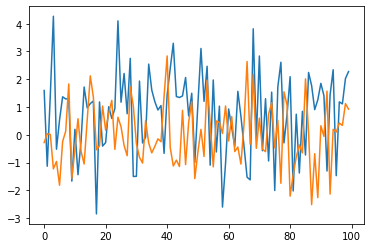

In [22]:
plt.plot(myData)

Now make the numpy array into a pandas data frame:

In [35]:
myDataFr = pd.DataFrame(myData, columns=["VarA", "VarB"])

Save the data frame to a .csv (comma separated values) file:

In [36]:
myDataFr.to_csv("testOutFile.csv", index=False)

### Here's where the students' part starts!

There are many ways that data can be stored, from excel files to tables on webpages.

Aside. We can even copy data to the clipboard and read that in. I just copied the [population of Burkina Faso by year](https://en.wikipedia.org/wiki/Burkina_Faso) from wikibedia. And we can read that into a data frame like this:

In [36]:
cb = pd.read_clipboard()

In [37]:
cb

,Year,Million
0,1950,4.3
1,2000,11.6
2,2018,19.8


How cool is that?!?!

A very common genertic data file type is the comma separated values file, or .csv file. As the name implies, a file in this format consists values separated by commas to form rows, and "carriage returns" (CR) or "line feeds" (LF) marking the end of each row. \
Useless trivia: these terms come from typewritters and old-old-old school printers, respectively. Typewritters had a "carriage" that held the paper and moved to the left while you typed. When you got to the right edge of the paper, you hit the "carriage return" key and the whole carriage flew back (returned) to right with a loud clunk and advanced the paper down a line. To this day, the key on my brand new computer (as of 2021) still says "return". Old school printers used long continuous "fan fold" sheets of paper (they could be literally hundreds of feet long) and had to be told to advance the paper one line with a "line feed" command. Once you were done printing, you ripped/cut your paper off the printer sort of like you do with aluminum foil or plastic wrap!

Read the .csv file:

In [37]:
myDataFromFile = pd.read_csv("testOutFile.csv")

In [38]:
display(myDataFromFile)

,VarA,VarB
0,1.595719,-0.279534
1,-1.130897,0.041644
2,1.436053,0.009731
3,4.269103,-1.225033
4,-0.519213,-0.959494
...,...,...
95,-1.470956,0.095749
96,1.185341,0.425152
97,1.113088,0.336760
98,2.026796,1.123579


Yay!

Now we can start looking at the data in that pandasy way.

In addition to display(), we use data frame methods:

In [39]:
myDataFromFile.head()

,VarA,VarB
0,1.595719,-0.279534
1,-1.130897,0.041644
2,1.436053,0.009731
3,4.269103,-1.225033
4,-0.519213,-0.959494


In [40]:
myDataFromFile.tail()

,VarA,VarB
95,-1.470956,0.095749
96,1.185341,0.425152
97,1.113088,0.336760
98,2.026796,1.123579
99,2.277302,0.923766


In [41]:
myDataFromFile.describe()

,VarA,VarB
count,100.000000,100.000000
mean,0.751092,0.007449
std,1.482249,1.091570
min,-2.848649,-2.514986
25%,-0.406950,-0.651252
50%,1.076344,-0.101038
75%,1.599090,0.639803
max,4.269103,2.838880


And now for the fun way of looking at data...
A histogram:

<AxesSubplot:ylabel='Count'>

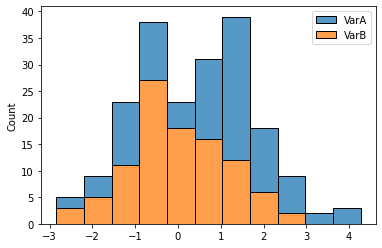

In [44]:
sns.histplot(myDataFromFile, multiple="stack")

<AxesSubplot:xlabel='VarA', ylabel='Density'>

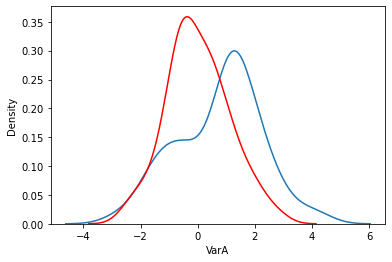

In [53]:
sns.kdeplot(myDataFromFile["VarA"])
sns.kdeplot(myDataFromFile["VarB"], color="r")

<AxesSubplot:xlabel='VarA', ylabel='Density'>

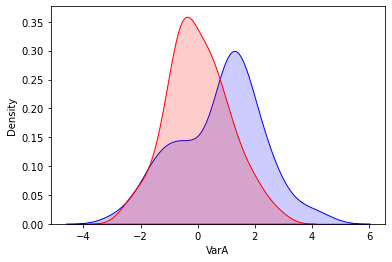

In [81]:
sns.kdeplot(myDataFromFile["VarA"], color="b", fill=True, alpha=0.2)
sns.kdeplot(myDataFromFile["VarB"], color="r", fill=True, alpha=0.2)

<AxesSubplot:xlabel='VarA', ylabel='Proportion'>

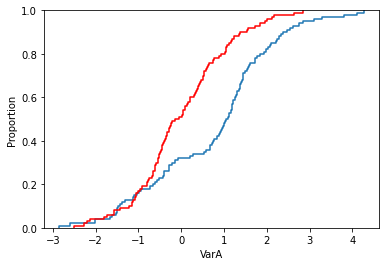

In [54]:
sns.ecdfplot(myDataFromFile["VarA"])
sns.ecdfplot(myDataFromFile["VarB"], color="r")

Now maybe save something and see if we can read it in again?

In [55]:
mySummary = myDataFromFile.describe()

In [57]:
type(mySummary)

pandas.core.frame.DataFrame

In [58]:
mySummary.to_csv("mySummary.csv")

In [60]:
mySumFF = pd.read_csv("mySummary.csv")

In [61]:
display(mySumFF)

,Unnamed: 0,VarA,VarB
0,count,100.000000,100.000000
1,mean,0.751092,0.007449
2,std,1.482249,1.091570
3,min,-2.848649,-2.514986
4,25%,-0.406950,-0.651252
5,50%,1.076344,-0.101038
6,75%,1.599090,0.639803
7,max,4.269103,2.838880


In [77]:
mySumFF.iloc[:,0]

0    count
1     mean
2      std
3      min
4      25%
5      50%
6      75%
7      max
Name: Unnamed: 0, dtype: object

In [78]:
mySumFF["Unnamed: 0"]

0    count
1     mean
2      std
3      min
4      25%
5      50%
6      75%
7      max
Name: Unnamed: 0, dtype: object